In [275]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore", category=UserWarning)

In [276]:
# Завантаження даних data_2d.csv
data_2d = pd.read_csv('data_hw_6/data_2d.csv', header=None)
data_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [277]:
#Стандартизуємо дані (1 та 2 стовпці)
X = data_2d.iloc[:, 1:] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.insert(0, '0', data_2d.iloc[:, 0])
df_scaled.columns = df_scaled.columns.astype(str)
print(df_scaled.head())

     0         1         2
0  0.0 -2.043526 -1.093360
1  0.0  0.751051  0.097092
2  0.0 -1.584843 -1.087383
3  0.0 -0.930072 -0.615868
4  0.0 -1.488555 -0.670942


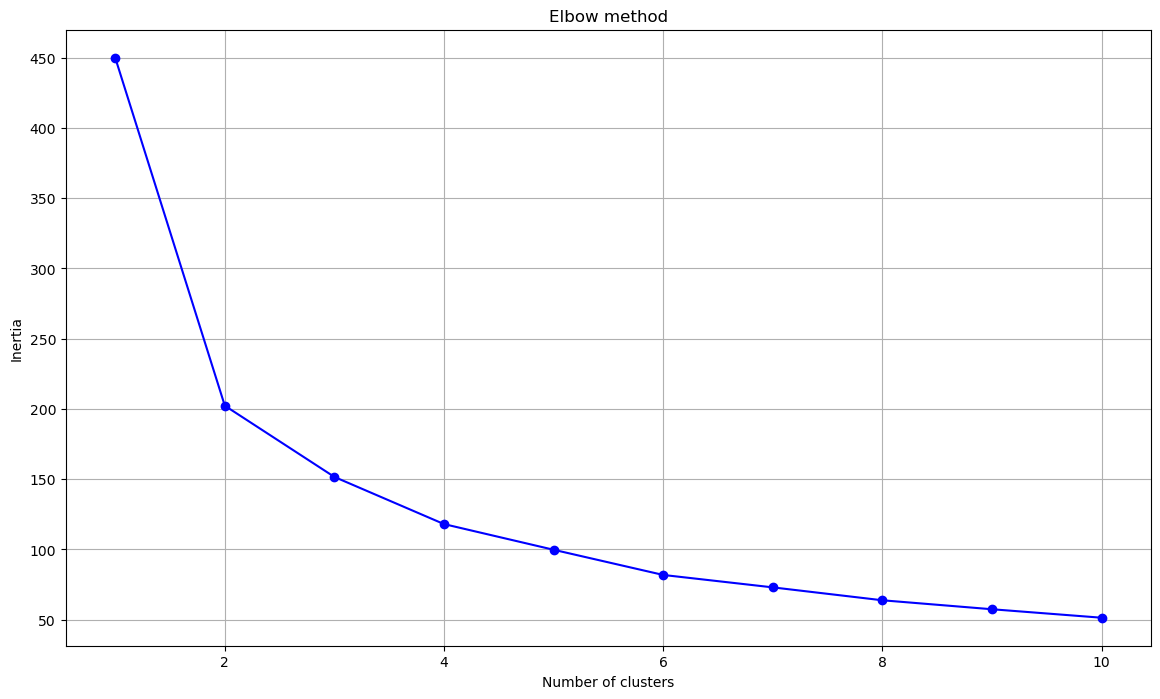

In [278]:
#Побудова графіку методу "локтя"
def elbow_method(data, max_clusters=10):
    inertia = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, n_init='auto').fit(data)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(14, 8))
    plt.plot(range(1, max_clusters + 1), inertia, 'bo-')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')    
    plt.grid()
    plt.show()
    
elbow_method(df_scaled)

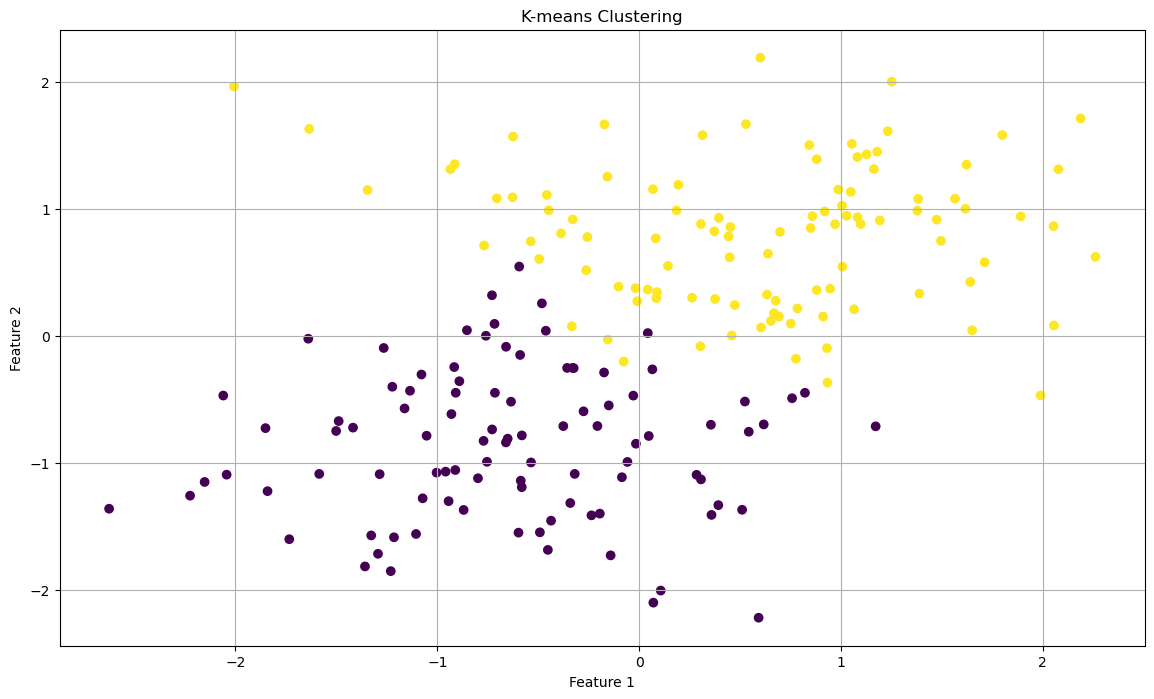

In [279]:
#Застосування алгоритму K-means

optimal_clusters_2d = 2
kmeans = KMeans(n_clusters=optimal_clusters_2d, n_init='auto').fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

plt.figure(figsize=(14, 8))
plt.scatter(df_scaled.iloc[:, 1], df_scaled.iloc[:, 2], c=df_scaled['cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

In [280]:
# Завантаження даних mnist.csv
data_mnist = pd.read_csv('data_hw_6/mnist.csv', header=None)
data_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
#Ввіділяємо мітки від даних mnist.csv
mnist_data = data_mnist.iloc[:, 1:]

#Стандартизуємо дані mnist.csv
scaler = StandardScaler()
X_scaled_mnist = scaler.fit_transform(mnist_data)

In [282]:
#Застосовуємо PCA 
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(X_scaled_mnist)

In [283]:
#Преобробляємо дані з PCA в DataFrame
df_mnist_2d = pd.DataFrame(mnist_2d, columns=['PCA1', 'PCA2'])

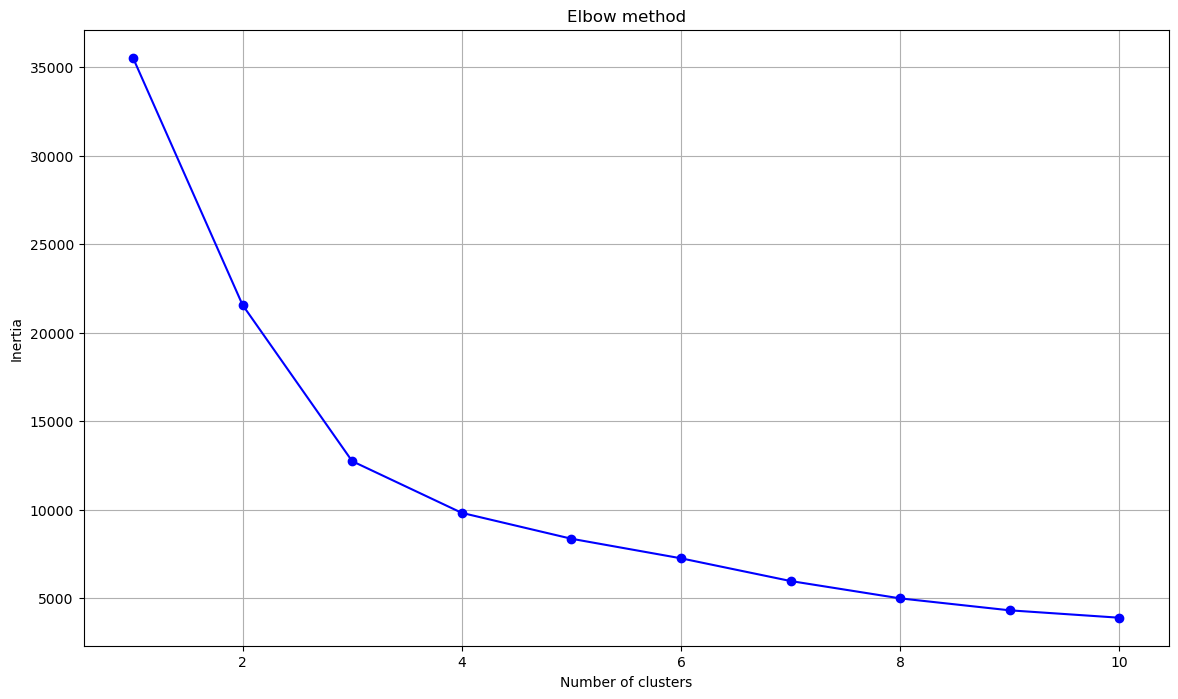

In [284]:
#Побудова графіка методу "локтя" для mnist
  
elbow_method(df_mnist_2d)

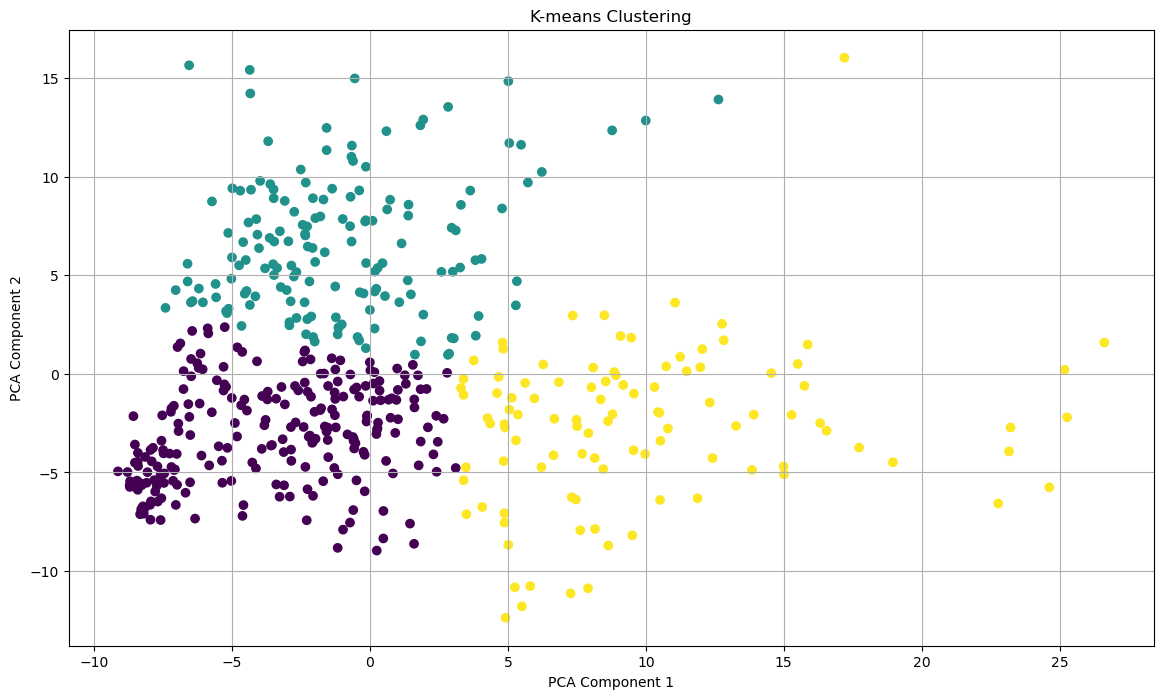

In [285]:
#Застосування алгоритму K-means для mnist

optimal_clusters_mnist = 3
kmeans = KMeans(n_clusters=optimal_clusters_mnist, n_init='auto').fit(df_mnist_2d)
df_mnist_2d['cluster'] = kmeans.labels_

plt.figure(figsize=(14, 8))
plt.scatter(df_mnist_2d['PCA1'], df_mnist_2d['PCA2'], c=df_mnist_2d['cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()